In [19]:
import numpy as np

arr = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

inidx = np.all(np.logical_and([2, 2] <= arr, arr <= [6, 6]), axis=1)
arr[inidx]

array([[3, 4],
       [5, 6]])

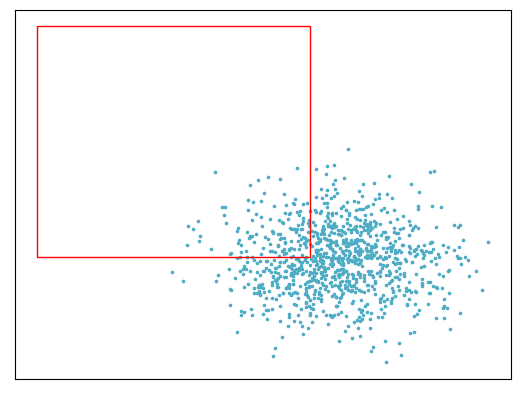

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Generate sample data
n_samples = 1000
n_components = 1

fig, ax = plt.subplots()

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)
X = X[:, ::-1]

# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

rect = patches.Rectangle((1, 1), 3, 4, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.xticks([])
plt.yticks([])
plt.show()

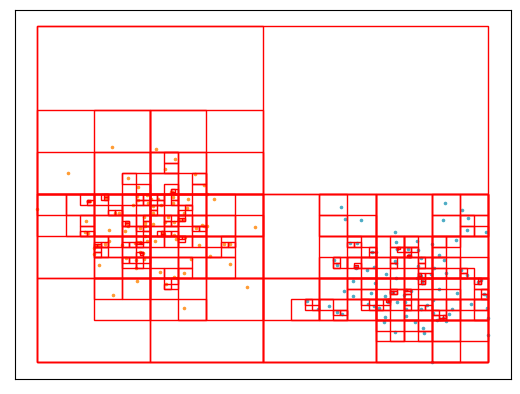

In [2]:
# let's try to test the visualization 

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import grav_sim as g
import visualizer as vis
import numpy as np

# Generate sample data (from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_plusplus.html#sphx-glr-auto-examples-cluster-plot-kmeans-plusplus-py)
n_samples = 200
n_components = 2

fig, ax = plt.subplots()

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)
X = X[:, ::-1]

# make the array of positions into an array of dummy particles
particles = np.array([g.Particle((pos[0], pos[1]), 1, 0) for pos in X])

# prepare a tree
tree = g.generate_tree(particles)

# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

vis.plot_tree(tree, particles, fig, ax)

plt.xticks([])
plt.yticks([])
plt.show()